In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_weather = pd.read_csv(r"C:\Users\navka\Downloads\archive (2).zip")
df_weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Text(0, 0.5, 'Weather summary')

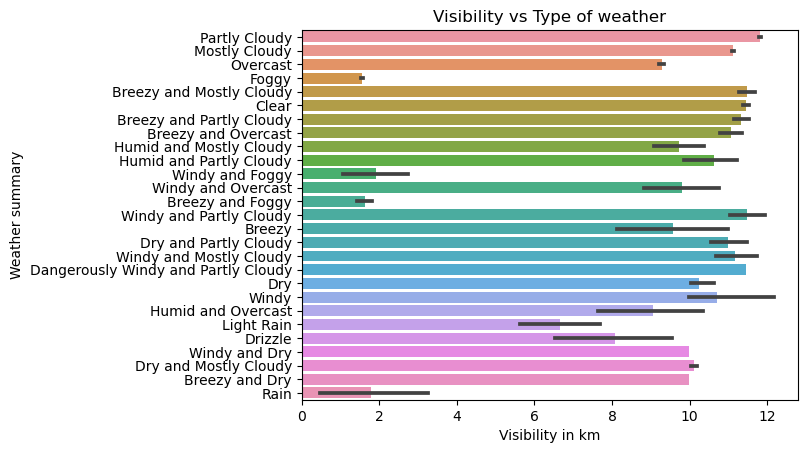

In [4]:
plt.title("Visibility vs Type of weather")
sns.color_palette("deep", as_cmap =True)
sns.barplot(x='Visibility (km)',y='Summary',data = df_weather)
plt.xlabel("Visibility in km")
plt.ylabel("Weather summary")


In [5]:
df_mean = df_weather["Visibility (km)"].mean()
df_mean


10.347324929237148

[Text(0.5, 1.0, 'Type of weather at Max humidity')]

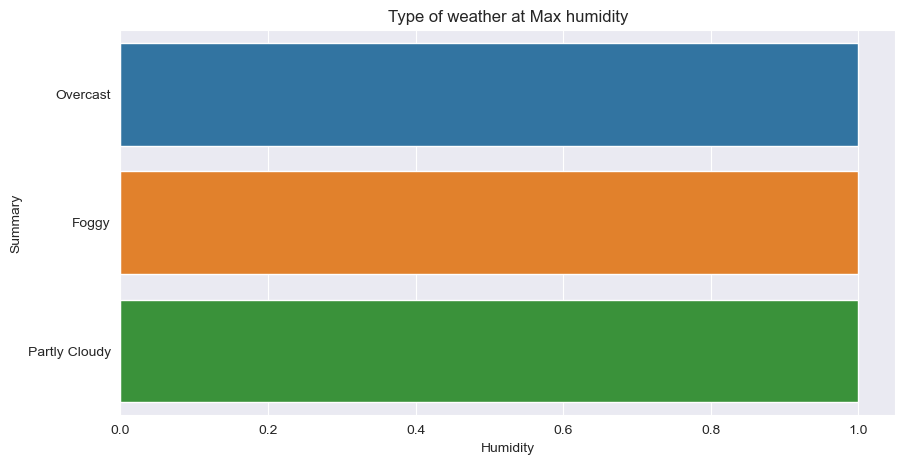

In [6]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
max_humidity=df_weather.sort_values("Humidity",ascending = False).head(10)
sns.barplot(x='Humidity',y='Summary',data=max_humidity).set(title= "Type of weather at Max humidity")

#means if humidity is more the type of weather which we get is foggy ,overcast or partly cloudy..


In [7]:
#Finding standard deviation to pressure
df_press_std = df_weather['Pressure (millibars)'].std()
df_press_std

116.96990568258147

In [8]:
sample_df = df_weather.sample(int(0.004*len(df_weather)))
print(len(sample_df))

385


[Text(0.5, 1.0, 'Relation between apparent temperature and exact temperature')]

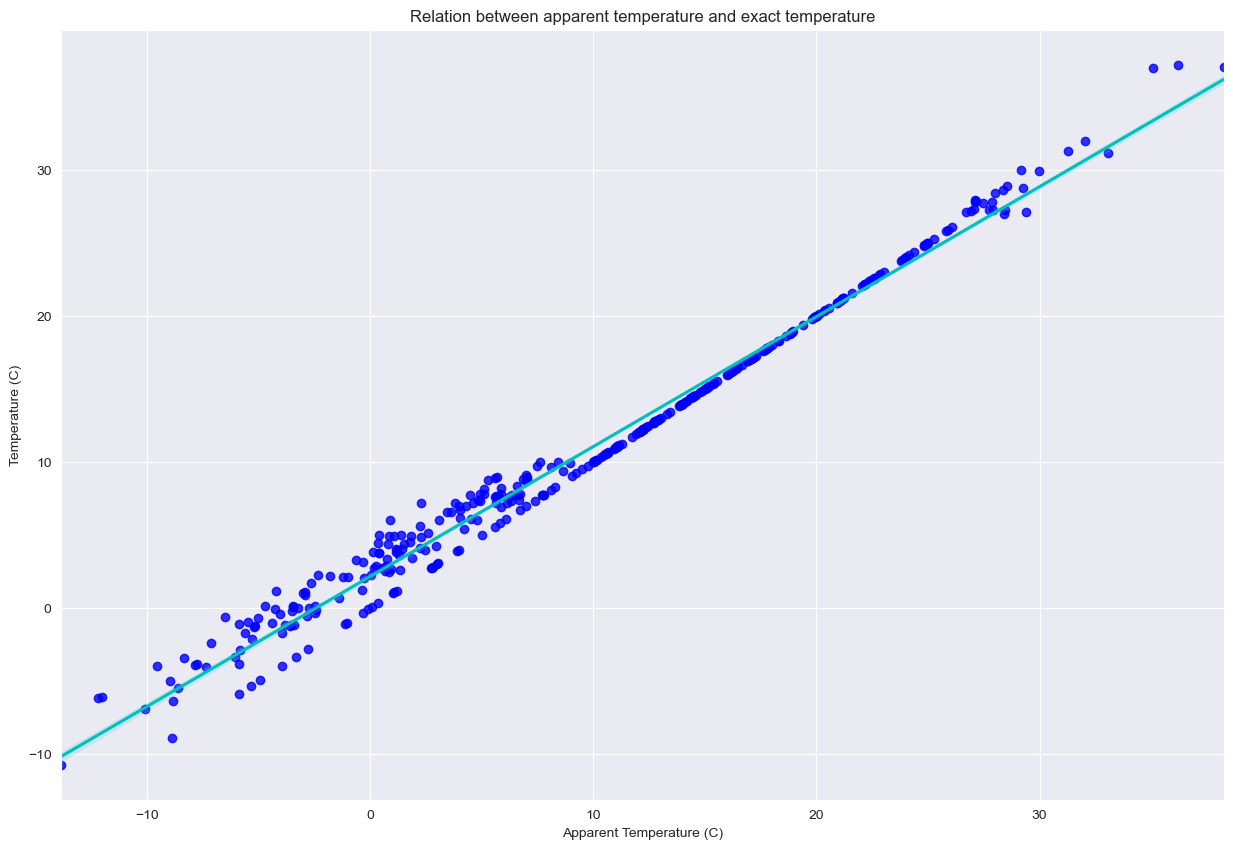

In [9]:
plt.figure(figsize=(15,10))
sns.regplot(data = sample_df,y= "Temperature (C)",x ="Apparent Temperature (C)",scatter_kws={"color": "b"}, line_kws={"color": "c"}).set(title = "Relation between apparent temperature and exact temperature")

#gives the result that as wind blows it decreases the apparent temperature

In [10]:
sort_df = df_weather.sort_values('Temperature (C)',ascending = True).head(10)
sort_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
54847,2012-02-10 07:00:00.000 +0100,Foggy,snow,-21.822222,-21.822222,0.80,3.0751,323.0,1.3685,0.0,1033.66,Foggy starting in the morning continuing until...
55493,2012-02-09 05:00:00.000 +0100,Foggy,snow,-21.111111,-21.111111,0.78,4.8300,180.0,2.5760,0.0,1033.30,Foggy until morning.
55490,2012-02-09 02:00:00.000 +0100,Foggy,snow,-21.111111,-21.111111,0.74,3.2200,200.0,1.9320,0.0,1034.30,Foggy until morning.
55494,2012-02-09 06:00:00.000 +0100,Foggy,snow,-21.111111,-21.111111,0.71,3.2200,190.0,1.9320,0.0,1032.60,Foggy until morning.
55495,2012-02-09 07:00:00.000 +0100,Foggy,snow,-20.783333,-20.783333,0.80,4.4275,181.0,1.7871,0.0,1032.33,Foggy until morning.
54866,2012-02-11 02:00:00.000 +0100,Foggy,snow,-20.555556,-25.922222,0.78,6.4400,30.0,1.4490,0.0,1032.10,Foggy starting overnight continuing until morn...
55491,2012-02-09 03:00:00.000 +0100,Partly Cloudy,snow,-20.555556,-20.555556,0.78,3.2200,200.0,4.0250,0.0,1033.80,Foggy until morning.
55492,2012-02-09 04:00:00.000 +0100,Foggy,snow,-20.277778,-25.072222,0.79,5.6672,158.0,1.8032,0.0,1033.53,Foggy until morning.
55489,2012-02-09 01:00:00.000 +0100,Foggy,snow,-20.050000,-25.200000,0.78,6.2146,170.0,1.7066,0.0,1034.74,Foggy until morning.
55470,2012-02-08 06:00:00.000 +0100,Foggy,snow,-20.000000,-20.000000,0.78,3.2200,170.0,1.9320,0.0,1034.30,Foggy until morning.


In [11]:
df_summary = df_weather["Summary"].unique()
df_summary

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [12]:
df_weather['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

[Text(0.5, 0, 'Temperature (C)'),
 Text(1.5, 0, 'Humidity'),
 Text(2.5, 0, 'Wind Bearing (degrees)'),
 Text(3.5, 0, 'Visibility (km)'),
 Text(4.5, 0, 'Pressure (millibars)')]

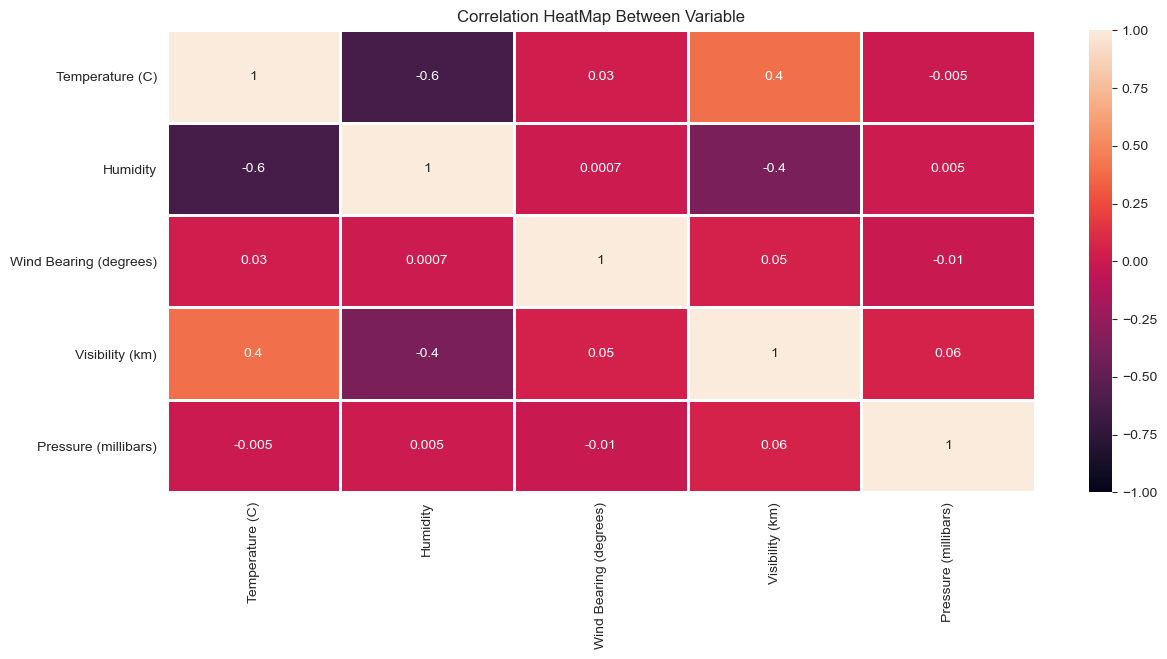

In [13]:
corr_df=df_weather.drop(["Apparent Temperature (C)","Wind Speed (km/h)","Daily Summary","Loud Cover"],axis =1).corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,fmt=".1g" ,vmin=-1, vmax=1 , center=0, cmap="rocket",linewidths=1 ,linecolor = "white" )
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [14]:
wind_unique = len(df_weather["Wind Speed (km/h)"].unique())
wind_unique

2484

In [15]:
#finding least temperature of all times.
df_snow = df_weather["Temperature (C)"].sort_values(ascending=True)
df_snow.head()


54847   -21.822222
55493   -21.111111
55490   -21.111111
55494   -21.111111
55495   -20.783333
Name: Temperature (C), dtype: float64